In [12]:
using PyPlot, Printf, SymPy, ForwardDiff, Roots
PyPlot.matplotlib.font_manager.fontManager.addfont("OpenSans-Regular.ttf")
PyPlot.matplotlib.style.use("grandbudapest.mplstyle")

function draw_axes(;color="0.6")
    axvline(x=0, color=color, lw=2, zorder=1)
    axhline(y=0, color=color, lw=2, zorder=1)
end

# markers = ["o", "*", "P", "X", "s", "D"]
# colorz = Dict("no gas" => "#95a5a6", "peace" => (0.0, 0.6, 0.8), "competition" => "#e74c3c")
colorz = Dict("no gas" => "k", "peace" => "C2", "cooperation" => "C0", "competition" => "C3")
marker = "X"

"X"

find $\delta$ that gives intermediate entropy

In [13]:
const kT_room = 2.479 # kJ/mol

function S(δ)
    p = 1 / (1 + exp(-δ / kT_room))
    return -p * log(p) - (1-p) * log(1-p)
end
want_zero(x) = S(x) - S(0.5) / 2

const δ_intermediate_S = find_zero(want_zero, (0, 15))

5.212934335655423

# entropy of the wheel

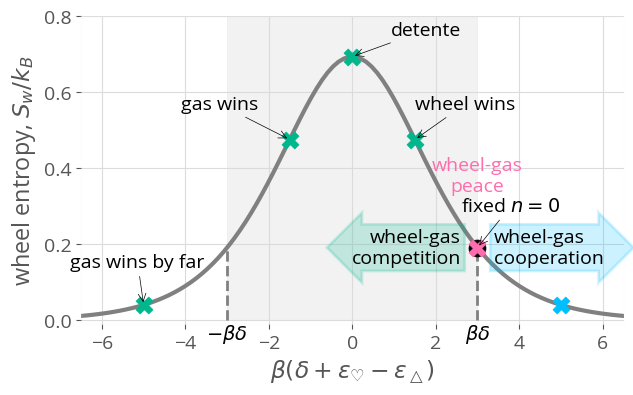

In [14]:
βθ = range(-6.5, 6.5, length=100)
w(βθ) = exp(-βθ) / (1.0 + exp(-βθ))
S(w) = -(w * log(w) + (1.0 - w) * log.(1.0 - w))

ht = 0.8 # height
wd = βθ[end] * 2 # width
function plot_θ(θ::Float64, marker::String, a_color, label, dx::Float64, dy::Float64)
    scatter([θ], [S(w(θ))], marker=marker, zorder=4, s=marker=="*" ? 1.35 * s : s, color=a_color)
#     text(θ + dx * wd, S(w(θ)) + dy * ht, label)
    if label == "none"
        return
    end
    if label != ""
        annotate(label,
                    xy=(θ, S(w(θ))), xycoords="data",
                    xytext=(θ + dx * wd, S(w(θ)) + dy * ht), textcoords="data",
                    arrowprops=Dict(:arrowstyle => "->", #linestyle="dashed",
                                    :color => "k"
                                    ),
                    zorder=1241,
                    )
    end
end

s = 150 # markersize
figure(figsize=(7, 4))
plot(βθ, S.(w.(βθ)), zorder=2, color="0.5", lw=3)
ylabel(L"wheel entropy, $S_w/k_B$")
xlabel(L"$\beta(\delta +\epsilon_\heartsuit-\epsilon_\bigtriangleup)$")

# two-state model (no gas)
βδ = 3.0
plot_θ(βδ, "o", colorz["no gas"], L"fixed $n=0$", -0.03, 0.12)
text(βδ, 0.34, "wheel-gas" * "\n" * "peace", color=colorz["peace"], ha="center")
plot_θ(βδ, marker, colorz["peace"], "", 0.0, 0.0)

dx = 0.4
bbox_props = Dict(:boxstyle=>"rarrow,pad=0.2", :fc=>colorz["cooperation"], :ec=>colorz["cooperation"], :lw=>2, :alpha=>0.2)
text([βδ + dx], [S(w(βδ))], "wheel-gas\ncooperation ", ha="left", va="center", rotation=0,
            size=14,
            bbox=bbox_props)

bbox_props = Dict(:boxstyle=>"larrow,pad=0.2", :fc=>colorz["competition"], :ec=>colorz["competition"], :lw=>2, :alpha=>0.2)
text([βδ - dx], [S(w(βδ))], "wheel-gas\ncompetition", ha="right", va="center", rotation=0,
            size=14,
            bbox=bbox_props)


# with gas. wheel-gas peace
βΩ♡ = -1.0
βω△ = -3.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["cooperation"], "none", 0.1/sqrt(2), 0.1/sqrt(2))

# with gas. wheel-gas competition. wheel wins.
βΩ♡ = -2.5
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "wheel wins", 0.0, 0.1)

# with gas. wheel-gas competition. detente
βΩ♡ = -4.0
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "detente", 0.1/sqrt(2), 0.1/sqrt(2))

# with gas. wheel-gas competition. gas wins.
βΩ♡ = -5.5
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "gas wins", -0.2, 0.1)

# with gas. wheel-gas competition. gas wins by far.
βΩ♡ = -9.0
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "gas wins by far", -0.135, 0.125)

# # legend(numpoints=1, bbox_to_anchor=(1, 0.8))
# title(L"how does adsorbed gas affect $S_\mathrm{wheel}$?")
# # draw_axes()
xlim([-wd/2, wd/2])
ylim([-0.01, ht])

fill_between([-βδ, βδ], zeros(2), ht * ones(2), color="0.5", alpha=0.1, zorder=0)

vlines(βδ, 0.0, S(w(βδ)), linestyle="--", color="0.5")
vlines(-βδ, 0.0, S(w(-βδ)), linestyle="--", color="0.5")
x_t = collect(-6:2:6)
xticks(x_t)
text(βδ, -0.05, L"$\beta\delta$", ha="center")
text(-βδ, -0.05, L"$-\beta\delta$", ha="center")

savefig("wheel_entropy.pdf", format="pdf", bbox_inches="tight")

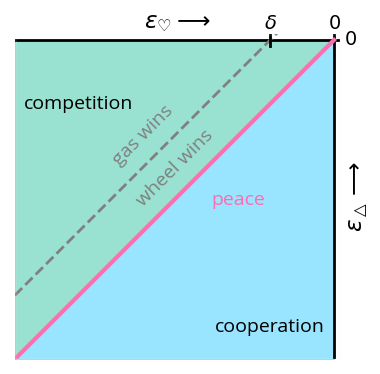

In [15]:
δ = 1.0
ϵ♡ = range(-5.0, 0.0, length=10)
ϵΔ = range(-5.0, 0.0, length=10)

fig, ax = subplots(figsize=(4, 4))
plot(ϵ♡, ϵΔ, color=colorz["peace"], lw=3, label="peace")
plot(ϵ♡, ϵ♡.+δ, color="0.5", linestyle="--")

xticks([])
yticks([])


ax.set_xlabel(L"$\epsilon_\heartsuit \longrightarrow$", color="k")
ax.xaxis.set_label_position("top") 


ax.set_ylabel(L"$\epsilon_\bigtriangleup \longrightarrow$", color="k")
ax.yaxis.set_label_position("right") 

# annotate(s="", xy=(0,-5.0), xytext=(0,0.1), arrowprops=Dict("facecolor"=>"k", "lw"=>1))
draw_axes(color="k")
fill_between(ϵ♡, -5.0, ϵ♡, color=colorz["cooperation"], label="cooperation",alpha=0.4)
fill_between(ϵ♡, 0.0, ϵ♡, color=colorz["competition"], label="competition",alpha=0.4)
xlim([-5.0, 0.1])
ylim([-5.0, 0.1])

text(-4., -1.0, "competition", ha="center", va="center")
text(-1.0, -4.5, "cooperation", ha="center", va="center")
text(-1.5, -2.5, "peace", ha="center", va="center", color=colorz["peace"])
text(-2.5, -2.0, "wheel wins", ha="center", va="center", rotation=45.0, color="0.5")
text(-3.0, -1.5, "gas wins", ha="center", va="center", rotation=45.0, color="0.5")
plot([-δ, -δ], [-0.1, 0.1], color="k")
text(-δ, 0.25, L"$\delta$", ha="center", va="center")
text(0.0, 0.25, L"$0$", ha="center", va="center")
text(0.25, 0.0, L"$0$", ha="center", va="center")
ax.set_aspect("equal", adjustable="box")
tight_layout()
savefig("mat_space.pdf", format="pdf")

# Langmuir model

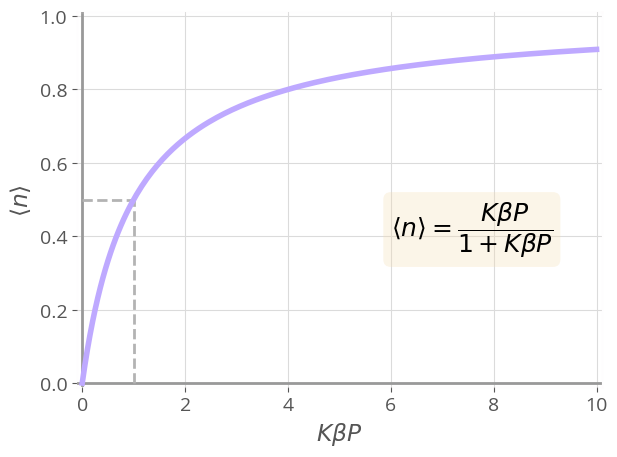

In [16]:
kp = range(0.0, 10.0, length=200)
exp_n = kp ./ (1 .+ kp)

figure()
plot(kp, exp_n, linewidth=4, color="C4")
ϵ=1e-1
xlim([0-ϵ, maximum(kp)+ϵ])
ϵ=1e-2
ylim([0-ϵ, 1+ϵ])
xlabel(L"$K\beta P$")
ylabel(L"$\langle n \rangle$")
draw_axes()
props = Dict("boxstyle"=>"round", "facecolor"=>"wheat", "alpha"=>0.3)
text(6, 0.4, L"$\langle n \rangle=\dfrac{K\beta P}{1+K\beta P}$", fontsize=18, bbox=props)
vlines(1, 0, 0.5, color="0.7", linestyle="--")
hlines(0.5, 0, 1, color="0.7", linestyle="--")
# title("Langmuir adsorption")
tight_layout()
savefig("langmuir.pdf", format="pdf")

# other stuff

In [17]:
struct Material
    δ::Float64
    ϵ♡::Float64
    ϵ△::Float64
end

function Base.show(io::IO, material::Material)
    @printf("MORF material with:\n\tδ = %.3f\n\tϵ♡ = %.3f\n\tϵ△ = %.3f\n", material.δ, material.ϵ♡, material.ϵ△)
end

In [18]:
function K(material::Material, kT::Real) # must assert β::Real as opposed to β::Float64 for ForwardDiff.jl to work
    # probability ring is on ♡ when gas is absent
    p = 1 / (1 + exp(-material.δ / kT))
    return p * exp(-material.ϵ△ / kT) + (1 - p) * exp(-material.ϵ♡ / kT)
end

function n(material::Material, kT::Real, P::Float64) # must use Real for ForwardDiff.jl
    KβP = K(material, kT) * P / kT
    return KβP / (1.0 + KβP)
end

function w(material::Material, kT::Real, P::Float64)
    β = 1 / (kT)
    p_Δ = exp(-β * material.δ) / (1 + exp(-β * material.δ)) # in two-state model for ring without gas
    return p_Δ * (1 + exp(-β * material.ϵ♡) * β * P) / (1 + K(material, kT) * β * P)
end

w (generic function with 2 methods)

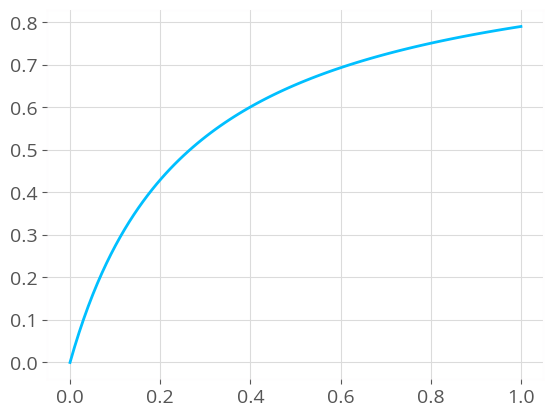

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdbe78e72e8>

In [19]:
material = Material(2.0, -4.0, -6.0)
figure()
p = range(0, 1, length=100)
plot(p, [n(material, kT_room, p_i) for p_i in p])

In [20]:
function ∂n_∂kT(material::Material, kT::Float64, P::Float64)
    # view n as a function of β only.
    n_of_kT(x) = n(material, x[1], P) # x plays role of kT
    ∂n_∂kT_of_T = x -> ForwardDiff.gradient(n_of_kT, x) # x plays role of kT
    return ∂n_∂kT_of_T([kT])[1]
end

function ∂K_∂kT(material::Material, kT::Float64)
    # view K as a function of kT only.
    K_of_kT(x) = K(material, x[1]) # x plays role of kT
    ∂K_∂kT_of_kT = x -> ForwardDiff.gradient(K_of_kT, x) # x plays role of kT
    return ∂K_∂kT_of_kT([kT])[1]
end

∂K_∂kT (generic function with 1 method)

## check with symbolic differentiation

In [21]:
kT = Sym("kT")
ϵ♡ = Sym("ϵ♡")
ϵ△ = Sym("ϵ△")
δ = Sym("δ")
P = Sym("P")

const K_symbolic = 1 / (1+exp(-δ/kT)) * (exp(-ϵ△/kT) + exp(-(ϵ♡+δ)/kT))

 -δ - ϵ♡    -ϵ△ 
 ───────    ────
    kT       kT 
ℯ        + ℯ    
────────────────
         -δ     
         ───    
          kT    
    1 + ℯ       

In [22]:
const n_symbolic = K_symbolic * P / kT / (1 + K_symbolic * P / kT)

            ⎛ -δ - ϵ♡    -ϵ△ ⎞          
            ⎜ ───────    ────⎟          
            ⎜    kT       kT ⎟          
          P⋅⎝ℯ        + ℯ    ⎠          
────────────────────────────────────────
              ⎛  ⎛ -δ - ϵ♡    -ϵ△ ⎞    ⎞
   ⎛     -δ ⎞ ⎜  ⎜ ───────    ────⎟    ⎟
   ⎜     ───⎟ ⎜  ⎜    kT       kT ⎟    ⎟
   ⎜      kT⎟ ⎜P⋅⎝ℯ        + ℯ    ⎠    ⎟
kT⋅⎝1 + ℯ   ⎠⋅⎜──────────────────── + 1⎟
              ⎜      ⎛     -δ ⎞        ⎟
              ⎜      ⎜     ───⎟        ⎟
              ⎜      ⎜      kT⎟        ⎟
              ⎝   kT⋅⎝1 + ℯ   ⎠        ⎠

In [23]:
const ∂n_∂kT_symbolic = diff(n_symbolic, "kT")

                                                                ⎛    ⎛    -ϵ△ 
                                                                ⎜    ⎜    ────
                                                                ⎜    ⎜     kT 
                                                                ⎜    ⎜ϵ△⋅ℯ    
                                             ⎛ -δ - ϵ♡    -ϵ△ ⎞ ⎜  P⋅⎜────────
                                             ⎜ ───────    ────⎟ ⎜    ⎜    2   
     ⎛    -ϵ△               -δ - ϵ♡⎞         ⎜    kT       kT ⎟ ⎜    ⎝  kT    
     ⎜    ────              ───────⎟       P⋅⎝ℯ        + ℯ    ⎠⋅⎜- ───────────
     ⎜     kT                  kT  ⎟                            ⎜             
     ⎜ϵ△⋅ℯ       (-δ - ϵ♡)⋅ℯ       ⎟                            ⎜             
   P⋅⎜──────── - ──────────────────⎟                            ⎜             
     ⎜    2               2        ⎟                            ⎜            k
     ⎝  kT              kT         ⎠                

In [24]:
const ∂K_∂kT_symbolic = diff(K_symbolic, "kT")

    -ϵ△               -δ - ϵ♡                            
    ────              ───────                            
     kT                  kT                              
ϵ△⋅ℯ       (-δ - ϵ♡)⋅ℯ            ⎛ -δ - ϵ♡    -ϵ△ ⎞  -δ 
──────── - ──────────────────     ⎜ ───────    ────⎟  ───
    2               2             ⎜    kT       kT ⎟   kT
  kT              kT            δ⋅⎝ℯ        + ℯ    ⎠⋅ℯ   
───────────────────────────── - ─────────────────────────
                -δ                                 2     
                ───                      ⎛     -δ ⎞      
                 kT                      ⎜     ───⎟      
           1 + ℯ                       2 ⎜      kT⎟      
                                     kT ⋅⎝1 + ℯ   ⎠      

In [25]:
# if P is not involved
function eval_sym(sym::Sym, material::Material, kT::Float64)
    params = Dict("kT" => kT, "ϵ♡" => material.ϵ♡, "ϵ△" => material.ϵ△, "δ" => material.δ)
    return convert(Float64, sym.subs(params))
end

# if P is involved
function eval_sym(sym::Sym, material::Material, kT::Float64, P::Float64)
    params = Dict("kT" => kT, "ϵ♡" => material.ϵ♡, "ϵ△" => material.ϵ△, "δ" => material.δ, "P" => P)
    return convert(Float64, sym.subs(params))
end

eval_sym (generic function with 2 methods)

tests

In [26]:
material = Material(rand(), -rand(), -rand())
kT = rand()
P = rand()
params = Dict("kT" => kT, "ϵ♡" => material.ϵ♡, "ϵ△" => material.ϵ△, "δ" => material.δ)

# K
@assert isapprox(K(material, kT), eval_sym(K_symbolic, material, kT))
# dK/d(kT)
@assert isapprox(∂K_∂kT(material, kT), eval_sym(∂K_∂kT_symbolic, material, kT))
# n (P=0.2)
@assert isapprox(n(material, kT, P), eval_sym(n_symbolic, material, kT, P))
# dn/d(kT)
@assert isapprox(∂n_∂kT(material, kT, P), eval_sym(∂n_∂kT_symbolic, material, kT, P))

## to study comparable Langmuir material

In [76]:
"""
What is the energy of adsorption ϵ for a Langmuir material that exhibits the same K as the RMS-MOF at β?
K_L = e^(-βϵ)
"""
get_ϵ□(material::Material, kT::Real) = -kT * log(K(material, kT))
function ∂K□_∂kT(ϵ□::Float64, kT::Float64)
    K□ = exp(-ϵ□ / kT)
    return K□ * ϵ□ / kT ^ 2
end

function n□(ϵ□::Float64, kT::Real, P::Float64)
    K□ = exp(-ϵ□ / kT)
    KβP = K□ * P / kT
    return KβP / (1 + KβP)
end

# special b/c need to keep ϵ□ fixed...
function ∂n□_∂kT(ϵ□::Float64, kT::Real, P::Float64)
    # view n as a function of β only.
    n□_of_kT(x) = n□(ϵ□, x[1], P) # x plays role of kT
    ∂n□_∂kT_of_T = x -> ForwardDiff.gradient(n□_of_kT, x) # x plays role of kT
    return ∂n□_∂kT_of_T([kT])[1]
end

ϵ□_test = randn()
RMSMOF□□ = Material(randn(), ϵ□_test, ϵ□_test)

@assert exp(-get_ϵ□(material, kT) / kT) ≈ K(material, kT)
@assert get_ϵ□(RMSMOF□□, kT) ≈ ϵ□_test
@assert n□(ϵ□_test, kT, P) ≈ n(RMSMOF□□, kT, P)

In [77]:
δ = 3.0
kT = kT_room
nb_pts = 50
ϵ_range = range(-10.0, stop=0.0, length=nb_pts)

ϵ□s = zeros(nb_pts, nb_pts)
z = similar(ϵ□s)
for (i, ϵ♡) in enumerate(ϵ_range)
    for (j, ϵ△) in enumerate(ϵ_range)
        material = Material(δ, ϵ♡, ϵ△)
        
        # find epsilon that gives same K for Langmuir material
        ϵ□ = get_ϵ□(material, kT)
        K□ = exp(-ϵ□ / kT)
        @assert K□ ≈ K(material, kT)
        
        ϵ□s[j, i] = ϵ□
        
        z[j, i] = ∂K_∂kT(material, kT) / K(material, kT) - ∂K□_∂kT(ϵ□, kT) / K□
#         z[j, i] = ∂K_∂kT(material, kT) - ∂K□_∂kT(ϵ□, kT)
        # j, i... this is not a bug.
        #  try the following two to see:
        #    Z[j, i] = βϵ♡
        #    Z[j, i] = βϵ△
    end
end

function decorate_fig(cbar_label::LaTeXString)
    ax.set_aspect("equal", "box")

    cbar = colorbar(label=cbar_label)
    xlabel(L"$\epsilon_\heartsuit$ [kJ/mol]")
    ylabel(L"$\epsilon_\bigtriangleup$ [kJ/mol]")
    ylim(ymax=0.0)
    tight_layout()
end

decorate_fig (generic function with 1 method)

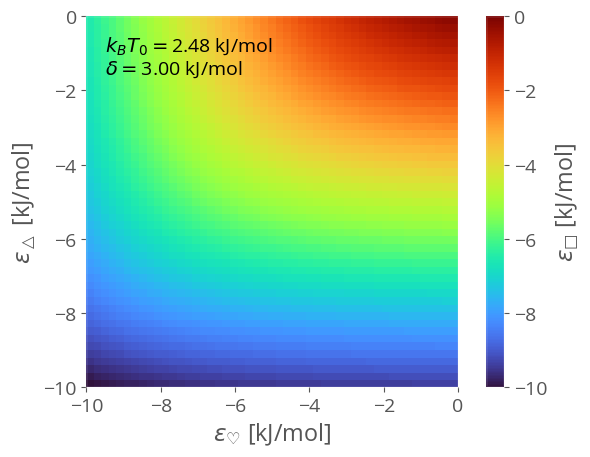

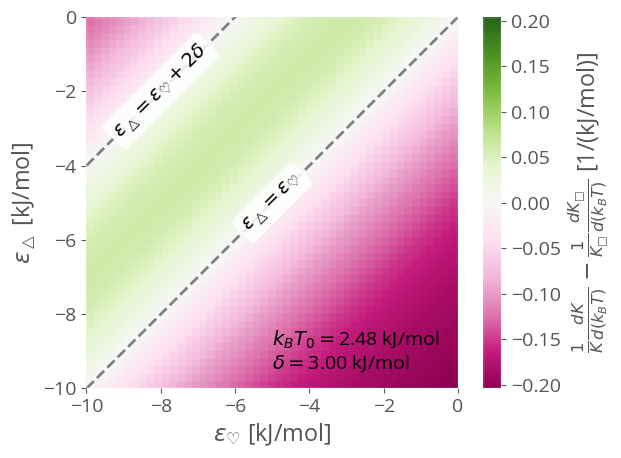

In [78]:
fig, ax = subplots()
pcolor(ϵ_range, ϵ_range, ϵ□s, vmax=0.0, cmap=plt.cm.turbo)
decorate_fig(L"$\epsilon_□$ [kJ/mol]")
savefig("epsilon_square.pdf", format="pdf")
text(-9.5, -1.1, L"$k_BT_0=$" * @sprintf("%.2f kJ/mol", kT) * "\n" * L"$\delta=$" * @sprintf("%.2f kJ/mol", δ), ha="left", va="center")
tight_layout()
savefig("epsilon_square.pdf", format="pdf")

fig, ax = subplots()
pcolor(ϵ_range, ϵ_range, z, cmap=plt.cm.PiYG, vmax=maximum(abs.(z)), vmin=-maximum(abs.(z)))
plot(ϵ_range, ϵ_range .+ 2 * δ, linestyle="--", color="0.5")
plot(ϵ_range, ϵ_range, linestyle="--", color="0.5")
props = Dict("boxstyle"=>"round", "facecolor"=>"white", "alpha"=>0.85)
text(-5, -5, L"$\epsilon_\bigtriangleup=\epsilon_\heartsuit$", ha="center", va="center", rotation=45, bbox=props)
text(-8, -8+2*δ, L"$\epsilon_\bigtriangleup=\epsilon_\heartsuit+2\delta$", ha="center", va="center", rotation=45, bbox=props)
text(-5, -9, L"$k_BT_0=$" * @sprintf("%.2f kJ/mol", kT) * "\n" * L"$\delta=$" * @sprintf("%.2f kJ/mol", δ), ha="left", va="center")
decorate_fig(L"$\frac{1}{K}\frac{d K}{d (k_BT)}-\frac{1}{K_□}\frac{d K_□}{d (k_BT)}$ [1/(kJ/mol)]")

# savefig("epsilon_square.pdf", format="pdf")

## illustrate with canonical RMS-MOFs

In [79]:
rms_mofs = Dict(
    ##
    # COMPETITION: gas loves ♡, so does wheel. 
    #              ϵ♡ < ϵ△
    #  gas wins: ϵ♡ + δ < ϵ△
    "competition (gas wins)" => Material(δ, -δ*3, -δ),
    "competition (gas wins by far)" => Material(δ, -15.0, -5.0),
    #  whl wins: ϵ♡ + δ > ϵ△
    "competition (whl wins)" => Material(δ, -δ*0.5, -δ*0.25),
    #  detent: ϵ♡ + δ = ϵ△
    "wheel-gas competition (detente)"                => Material(δ, -δ*2, -δ),
    ##
    # COOPERATION: gas loves △, wheel loves ♡
    #              ϵ△ < ϵ♡
    "wheel-gas cooperation"            => Material(1.0, -2.0, -10.0)
)

@assert rms_mofs["competition (gas wins)"].ϵ△ > rms_mofs["competition (gas wins)"].ϵ♡ + rms_mofs["competition (gas wins)"].δ
@assert rms_mofs["competition (whl wins)"].ϵ△ < rms_mofs["competition (whl wins)"].ϵ♡ + rms_mofs["competition (whl wins)"].δ
@assert rms_mofs["competition (whl wins)"].ϵ△ > rms_mofs["competition (whl wins)"].ϵ♡
@assert rms_mofs["wheel-gas cooperation"].ϵ△ < rms_mofs["wheel-gas cooperation"].ϵ♡
@assert rms_mofs["wheel-gas competition (detente)"].ϵ△ ≈ rms_mofs["wheel-gas competition (detente)"].ϵ♡ + rms_mofs["wheel-gas competition (detente)"].δ

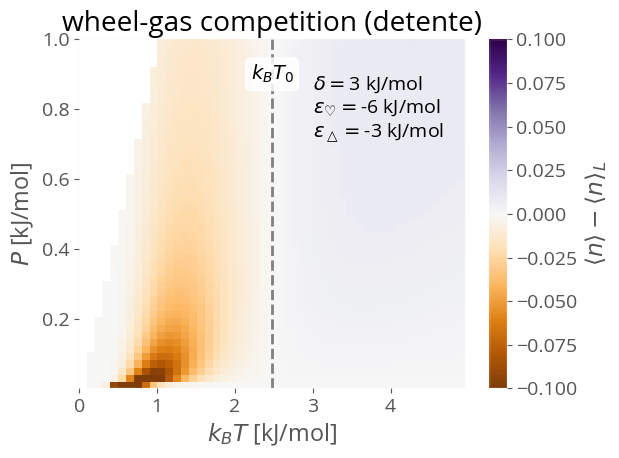

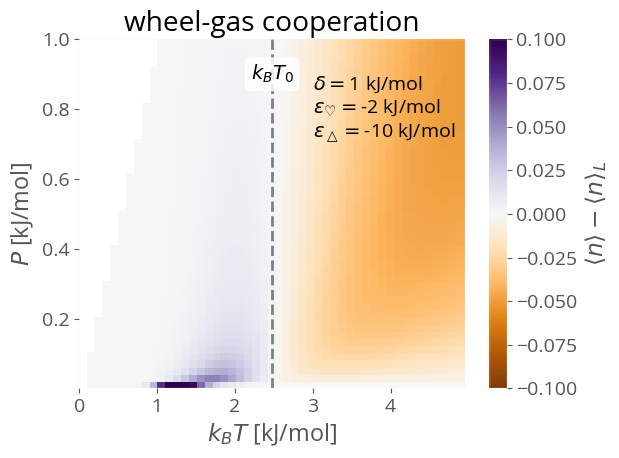

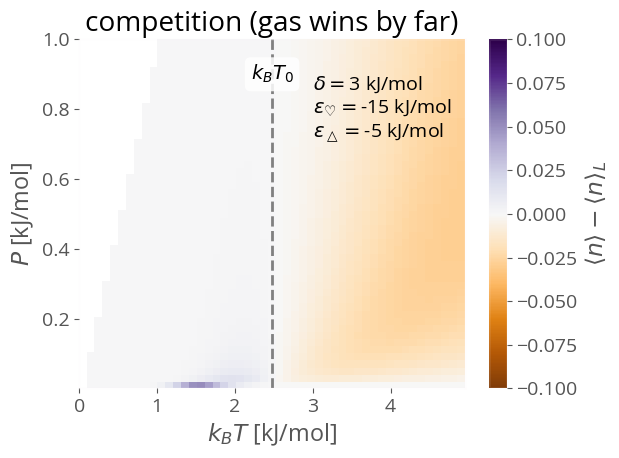

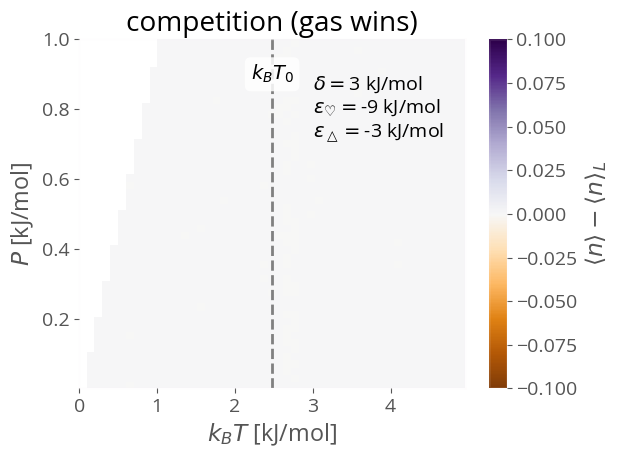

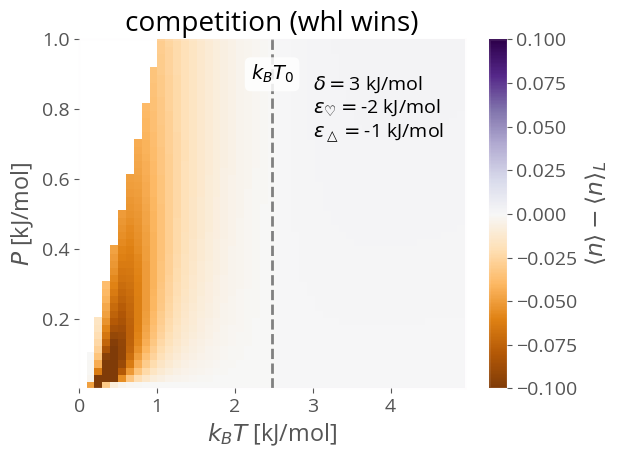

In [91]:
kTs = range(0.0, 2 * kT_room, length=nb_pts)
Ps = range(0.001, 1.0, length=nb_pts)
z = zeros(nb_pts, nb_pts)

for (rms_mof_class, rms_mof) in rms_mofs
    ϵ□ = get_ϵ□(rms_mof, kT_room)
    for (i, kT) in enumerate(kTs)
        for (j, P) in enumerate(Ps)
            z[j, i] = n(rms_mof, kT, P) - n□(ϵ□, kT, P)
#             z[j, i] = ∂n_∂kT(rms_mof, kT, P) / n(rms_mof, kT, P) - ∂n□_∂kT(ϵ□, kT, P) / n□(ϵ□, kT, P)
            if P / kT > 1.0
                z[j, i] = NaN
            end
        end
    end
    
    fig, ax = subplots()
    pcolor(kTs, Ps, z, cmap=plt.cm.PuOr, vmin=-0.1, vmax=0.1)
    text(kT_room, 0.9, L"$k_BT_0$", 
        ha="center", va="center", bbox=props)
    text(3, 0.9, L"$\delta=$" * @sprintf("%d kJ/mol", rms_mof.δ) * "\n" *
        L"$\epsilon_\heartsuit=$" * @sprintf("%d kJ/mol", rms_mof.ϵ♡) * "\n" * 
        L"$\epsilon_\bigtriangleup=$" * @sprintf("%d kJ/mol", rms_mof.ϵ△), 
        ha="left", va="top")
    cbar = colorbar(label=L"$\langle n\rangle - \langle n \rangle_L$")
    axvline(x=kT_room, linestyle="--", color="0.5")
    xlabel(L"$k_BT$ [kJ/mol]")
    ylabel(L"$P$ [kJ/mol]")
    title(rms_mof_class)
    tight_layout()
end

# wheel stuff

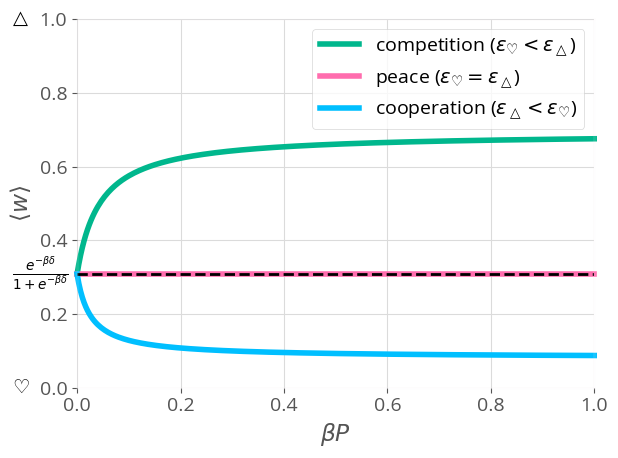

material where gas loves Δ: MORF material with:
	δ = 2.000
	ϵ♡ = -8.000
	ϵ△ = -12.000

material where gas loves ♡: MORF material with:
	δ = 2.000
	ϵ♡ = -12.000
	ϵ△ = -8.000



In [332]:
kT = kT_room
δ = 2.0

material_gas_loves_♡ = Material(δ, -12.0, -8.0) # competition
material_gas_agnostic = Material(δ, -10.0, -10.0) # peace
material_gas_loves_Δ = Material(δ, -8.0, -12.0) # cooperation

println("material where gas loves Δ: ", material_gas_loves_Δ)
println("material where gas loves ♡: ", material_gas_loves_♡)

w_no_gas = exp(-δ / kT) / (1 + exp(-δ / kT))

βP = range(0.0, stop=1.0, length=300)

w_gas_loves_Δ = [w(material_gas_loves_Δ, kT, βP_i) for βP_i in βP]
w_gas_loves_♡ = [w(material_gas_loves_♡, kT, βP_i) for βP_i in βP]
w_gas_agnostic = [w(material_gas_agnostic, kT, βP_i) for βP_i in βP]

figure()
plot(βP, w_gas_loves_♡, lw=4, color=colorz["competition"],
    label=L"competition ($\epsilon_\heartsuit <\epsilon_\bigtriangleup$)",
    #label=L"$\beta \epsilon_\heartsuit=$" * @sprintf("%d", material_gas_loves_♡.ϵ♡) * L"$<\beta \epsilon_\bigtriangleup=$" * @sprintf("%d", material_gas_loves_♡.ϵΔ),
    clip_on=false
)
plot(βP, w_gas_agnostic, lw=4, color=colorz["peace"],
    label=L"peace ($\epsilon_\heartsuit =\epsilon_\bigtriangleup$)",
    #label=L"$\beta \epsilon_\heartsuit=$" * @sprintf("%d", material_gas_loves_♡.ϵ♡) * L"$<\beta \epsilon_\bigtriangleup=$" * @sprintf("%d", material_gas_loves_♡.ϵΔ),
    clip_on=false
)

plot(βP, w_gas_loves_Δ, lw=4, color=colorz["cooperation"],
    label=L"cooperation ($\epsilon_\bigtriangleup <\epsilon_\heartsuit$)",
    #label=L"$\beta \epsilon_\bigtriangleup=$" * @sprintf("%d", material_gas_loves_Δ.ϵΔ) * L"$<\beta \epsilon_\heartsuit=$" * @sprintf("%d", material_gas_loves_Δ.ϵ♡),
    clip_on=false
)

# text(0.6, .5, L"$\beta \delta=$" * @sprintf("%d", material_gas_loves_♡.δ))
axhline(y=w_no_gas, color="k", linestyle="--")
text(-0.07, w_no_gas, L"$\frac{e^{-\beta \delta}}{1+e^{-\beta \delta}}$", va="center", ha="center")
xlabel(L"$\beta P$")
ylabel(L"\langle w \rangle")
ylim([0.0, 1.0])
xlim([0, 1])
text(-0.125, 0.0, L"$\heartsuit$", va="center")
text(-0.125, 1.0, L"$\bigtriangleup$", va="center")
legend()
tight_layout()
savefig("expected_w.pdf", format="pdf")

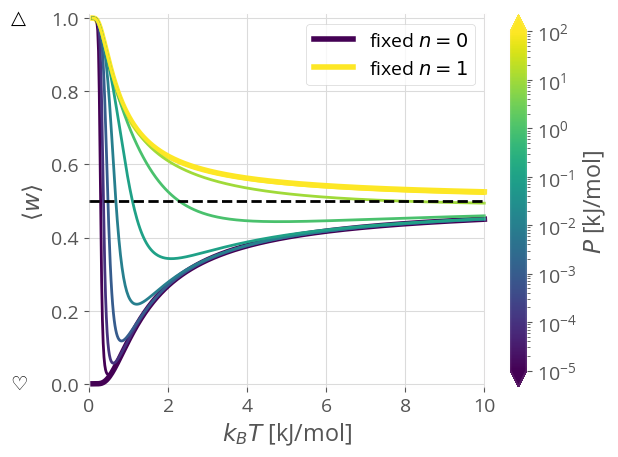

MORF material with:
	δ = 2.000
	ϵ♡ = -5.000
	ϵ△ = -2.000



In [353]:
material = Material(δ, -5.0, -2.0) # competition, gas wins
@assert (material.δ + material.ϵ♡) < material.ϵ△

println(material)
kTs = range(0.1, stop=10.0, length=500) # kJ/mol

P = vcat([0.0], 10. .^ (-5:2))

w_empty = exp.(-material.δ ./ kTs) ./ (1.0 .+ exp.(-material.δ ./ kTs))
w_full = exp.(-(material.ϵ♡ + material.δ) ./ kTs) ./ (exp.(-material.ϵ△ ./ kTs) .+ exp.(-(material.ϵ♡ + material.δ) ./ kTs))

cnorm = PyPlot.matplotlib.colors.LogNorm(vmin=minimum(P[2:end]), vmax=maximum(P))
P_to_color = PyPlot.matplotlib.cm.ScalarMappable(norm=cnorm, cmap=PyPlot.matplotlib.cm.get_cmap("viridis"))
P_to_color.set_array([])

fig, ax = subplots()
plot(kTs, w_empty, color=P_to_color.to_rgba(minimum(P[2:end])), label=L"fixed $n=0$", lw=4, clip_on=false)
plot(kTs, w_full, color=P_to_color.to_rgba(maximum(P)), label=L"fixed $n=1$", lw=4, clip_on=false)
xlabel(L"$k_BT$ [kJ/mol]")
ylabel(L"$\langle w \rangle$")
for P_i in P
    ws = [w(material, kT_i, P_i) for kT_i in kTs]
    plot(kTs, ws, color=P_to_color.to_rgba(P_i), clip_on=false)
end
axhline(y=0.5, color="k", linestyle="--")
colorbar(P_to_color, label=L"$P$ [kJ/mol]", extend="both")
ylim([-0.01, 1.01])
xlim([-0.01, maximum(kTs)+0.02])
legend()
text(-2, 0.0, L"$\heartsuit$", va="center")
text(-2, 1.0, L"$\bigtriangleup$", va="center")
tight_layout()
savefig("expected_w_T_dependence.pdf", format="pdf")

In [322]:
any(isnan.(w_empty))

false